In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

In [53]:
urlA = 'https://www.pro-football-reference.com/players/G/GreeA.00/fantasy/'
dfA = pd.read_html(urlA, header = [1], skiprows = 1)[0]

In [54]:
dfA

,Unnamed: 0,Tm,G,Att,Yds,TD,Tgt,Rec,Yds.1,TD.1,...,Num,Pct,Num.1,Pct.1,Num.2,Pct.2,FantPt,DKPt,FDPt,Unnamed: 26
0,2011.0,CIN,15,0.0,0.0,0.0,15,5,38,3,...,NaN,NaN,NaN,NaN,NaN,NaN,153.0,230.0,185.5,All 2011 Games
1,2012.0,CIN,16,1.0,11.0,0.0,22,11,71,8,...,960.0,90.8%,0.0,0.0%,2.0,0.4%,202.8,315.8,251.3,All 2012 Games
2,2013.0,CIN,16,0.0,0.0,0.0,21,9,59,4,...,1056.0,93.3%,0.0,0.0%,0.0,0.0%,208.6,324.6,257.6,All 2013 Games
3,2014.0,CIN,13,1.0,-3.0,0.0,11,6,71,3,...,649.0,75.6%,0.0,0.0%,0.0,0.0%,136.3,222.3,170.8,All 2014 Games
4,2015.0,CIN,16,0.0,0.0,0.0,18,9,82,7,...,931.0,88.2%,0.0,0.0%,2.0,0.5%,187.7,286.7,230.7,All 2015 Games
5,2016.0,CIN,10,0.0,0.0,0.0,9,7,56,2,...,555.0,80.7%,1.0,0.1%,0.0,0.0%,120.4,198.4,153.4,All 2016 Games
6,2017.0,CIN,16,0.0,0.0,0.0,16,7,72,6,...,852.0,88.6%,2.0,0.2%,0.0,0.0%,151.8,237.8,189.3,All 2017 Games
7,2018.0,CIN,9,0.0,0.0,0.0,13,6,49,4,...,458.0,78.7%,0.0,0.0%,0.0,0.0%,103.4,156.4,126.4,All 2018 Games
8,2020.0,CIN,16,0.0,0.0,0.0,9,3,20,2,...,820.0,76.2%,0.0,0.0%,0.0,0.0%,64.3,111.3,87.8,All 2020 Games
9,2021.0,ARI,16,NaN,NaN,NaN,17,5,36,2,...,888.0,80.5%,0.0,0.0%,2.0,0.5%,102.8,162.8,129.8,All 2021 Games


In [55]:
dfA.rename(columns={'Unnamed: 0': 'Year', 'Tm': 'Team', 'G': 'Games Played'})

,Year,Team,Games Played,Att,Yds,TD,Tgt,Rec,Yds.1,TD.1,...,Num,Pct,Num.1,Pct.1,Num.2,Pct.2,FantPt,DKPt,FDPt,Unnamed: 26
0,2011.0,CIN,15,0.0,0.0,0.0,15,5,38,3,...,NaN,NaN,NaN,NaN,NaN,NaN,153.0,230.0,185.5,All 2011 Games
1,2012.0,CIN,16,1.0,11.0,0.0,22,11,71,8,...,960.0,90.8%,0.0,0.0%,2.0,0.4%,202.8,315.8,251.3,All 2012 Games
2,2013.0,CIN,16,0.0,0.0,0.0,21,9,59,4,...,1056.0,93.3%,0.0,0.0%,0.0,0.0%,208.6,324.6,257.6,All 2013 Games
3,2014.0,CIN,13,1.0,-3.0,0.0,11,6,71,3,...,649.0,75.6%,0.0,0.0%,0.0,0.0%,136.3,222.3,170.8,All 2014 Games
4,2015.0,CIN,16,0.0,0.0,0.0,18,9,82,7,...,931.0,88.2%,0.0,0.0%,2.0,0.5%,187.7,286.7,230.7,All 2015 Games
5,2016.0,CIN,10,0.0,0.0,0.0,9,7,56,2,...,555.0,80.7%,1.0,0.1%,0.0,0.0%,120.4,198.4,153.4,All 2016 Games
6,2017.0,CIN,16,0.0,0.0,0.0,16,7,72,6,...,852.0,88.6%,2.0,0.2%,0.0,0.0%,151.8,237.8,189.3,All 2017 Games
7,2018.0,CIN,9,0.0,0.0,0.0,13,6,49,4,...,458.0,78.7%,0.0,0.0%,0.0,0.0%,103.4,156.4,126.4,All 2018 Games
8,2020.0,CIN,16,0.0,0.0,0.0,9,3,20,2,...,820.0,76.2%,0.0,0.0%,0.0,0.0%,64.3,111.3,87.8,All 2020 Games
9,2021.0,ARI,16,NaN,NaN,NaN,17,5,36,2,...,888.0,80.5%,0.0,0.0%,2.0,0.5%,102.8,162.8,129.8,All 2021 Games


In [56]:
#dfA.columns.drop(['Att', 'Yds', 'TD', 'Tgt', 'Rec', 'Yds.1', 'TD.1', 'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2', 'DKPt', 'FDPt', 'Unnamed: 26'])

In [57]:
dfA.keys()

Index(['Unnamed: 0', 'Tm', 'G', 'Att', 'Yds', 'TD', 'Tgt', 'Rec', 'Yds.1',
       'TD.1', 'Att.1', 'Yds.2', 'TD.2', 'Tgt.1', 'Rec.1', 'Yds.3', 'TD.3',
       'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2', 'FantPt', 'DKPt',
       'FDPt', 'Unnamed: 26'],
      dtype='object')

In [58]:
dfA_tidy = dfA.drop(columns = ['Att', 'Yds', 'TD', 'Tgt', 'Rec', 'Yds.1', 'TD.1',
       'Att.1', 'Yds.2', 'TD.2', 'Tgt.1', 'Rec.1', 'Yds.3', 'TD.3', 'Num',
       'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2', 'DKPt', 'FDPt', 'Unnamed: 26'])
dfA_aj = dfA_tidy.iloc[0:9]
dfA_aj.rename(columns={ 'Tm': 'Team', 'G': 'Games Played'})

,Unnamed: 0,Team,Games Played,FantPt
0,2011.0,CIN,15,153.0
1,2012.0,CIN,16,202.8
2,2013.0,CIN,16,208.6
3,2014.0,CIN,13,136.3
4,2015.0,CIN,16,187.7
5,2016.0,CIN,10,120.4
6,2017.0,CIN,16,151.8
7,2018.0,CIN,9,103.4
8,2020.0,CIN,16,64.3


The table above is for AJ Green, who was the WR1 from 2011 - 2020

In [59]:
urlB = 'https://www.pro-football-reference.com/players/D/DaltAn00/fantasy/'
dfB = pd.read_html(urlB, header = [1], skiprows = 1)[0]

In [60]:
dfB.keys()

Index(['Unnamed: 0', 'Tm', 'G', 'Cmp', 'Att', 'Yds', 'TD', 'Att.1', 'Yds.1',
       'TD.1', 'Tgt', 'Rec', 'Yds.2', 'TD.2', 'Cmp.1', 'Att.2', 'Yds.3',
       'TD.3', 'Att.3', 'Yds.4', 'TD.4', 'Num', 'Pct', 'Num.1', 'Pct.1',
       'Num.2', 'Pct.2', 'FantPt', 'DKPt', 'FDPt', 'Unnamed: 30'],
      dtype='object')

In [61]:
dfB_tidy = dfB.drop(columns = ['Cmp','Att', 'Yds', 'TD', 'Att.1', 'Yds.1',
       'TD.1', 'Tgt', 'Rec', 'Yds.2', 'TD.2', 'Cmp.1', 'Att.2', 'Yds.3',
       'TD.3', 'Att.3', 'Yds.4', 'TD.4', 'Num', 'Pct', 'Num.1', 'Pct.1',
       'Num.2', 'Pct.2', 'DKPt', 'FDPt', 'Unnamed: 30'])

In [62]:
dfB_ad = dfB_tidy.iloc[0:9]
dfB_ad.rename(columns={'Tm': 'Team', 'G': 'Games Played', 'Unnamed: 0': 'Year'})

,Year,Team,Games Played,FantPt
0,2011.0,CIN,16,207.12
1,2012.0,CIN,16,250.76
2,2013.0,CIN,16,288.02
3,2014.0,CIN,16,224.62
4,2015.0,CIN,13,244.20
5,2016.0,CIN,16,260.64
6,2017.0,CIN,16,210.70
7,2018.0,CIN,11,174.54
8,2019.0,CIN,13,202.66


The table above is for Andy Dalton, who was the QB1 from 2011 - 2019

In [63]:
urlC = 'https://www.pro-football-reference.com/players/C/ChasJa00/fantasy/'
dfC = pd.read_html(urlC, header = [1], skiprows = 1)[0]
dfC.keys()

Index(['Unnamed: 0', 'Tm', 'G', 'Att', 'Yds', 'TD', 'Tgt', 'Rec', 'Yds.1',
       'TD.1', 'Att.1', 'Yds.2', 'TD.2', 'Tgt.1', 'Rec.1', 'Yds.3', 'TD.3',
       'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2', 'FantPt', 'DKPt',
       'FDPt', 'Unnamed: 26'],
      dtype='object')

In [64]:
dfC_tidy = dfC.drop(columns = ['Att', 'Yds', 'TD', 'Tgt', 'Rec', 'Yds.1', 'TD.1',
       'Att.1', 'Yds.2', 'TD.2', 'Tgt.1', 'Rec.1', 'Yds.3', 'TD.3', 'Num',
       'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2', 'DKPt', 'FDPt', 'Unnamed: 26'])

In [65]:
dfC_jc = dfC_tidy.iloc[0:3]
dfC_jc.rename(columns={'Tm': 'Team', 'G': 'Games Played', 'Unnamed: 0': 'Year'})

,Year,Team,Games Played,FantPt
0,2021.0,CIN,17,223.60
1,2022.0,CIN,12,155.40
2,2023.0,CIN,16,162.72


The table above is for Ja'Marr Chase, who was the wr1 from 2021 - present

In [66]:
urlD = 'https://www.pro-football-reference.com/players/B/BurrJo01/fantasy/'
dfD = pd.read_html(urlD, header = [1], skiprows = 1)[0]
dfD.keys()

Index(['Unnamed: 0', 'Tm', 'G', 'Cmp', 'Att', 'Yds', 'TD', 'Att.1', 'Yds.1',
       'TD.1', 'Cmp.1', 'Att.2', 'Yds.2', 'TD.2', 'Att.3', 'Yds.3', 'TD.3',
       'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2', 'FantPt', 'DKPt',
       'FDPt', 'Unnamed: 26'],
      dtype='object')

In [67]:
dfD_tidy = dfD.drop(columns = ['Cmp', 'Att', 'Yds', 'TD', 'Att.1', 'Yds.1',
       'TD.1', 'Cmp.1', 'Att.2', 'Yds.2', 'TD.2', 'Att.3', 'Yds.3', 'TD.3',
       'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2','DKPt',
       'FDPt', 'Unnamed: 26'])

In [68]:
dfD_jb = dfD_tidy.iloc[0:4]
dfD_jb.rename(columns={'Tm': 'Team', 'G': 'Games Played', 'Unnamed: 0': 'Year'})

,Year,Team,Games Played,FantPt
0,2020.0,CIN,10,173.72
1,2021.0,CIN,16,314.24
2,2022.0,CIN,16,350.70
3,2023.0,CIN,10,147.16


The table above is for Joe Burrow, who was the qb1 from 2020 - present

In [69]:
urlE = 'https://www.pro-football-reference.com/players/B/BernGi00/fantasy/'
dfE = pd.read_html(urlE, header = [1], skiprows = 1)[0]
dfE.keys()

Index(['Unnamed: 0', 'Tm', 'G', 'Att', 'Yds', 'TD', 'Tgt', 'Rec', 'Yds.1',
       'TD.1', 'Att.1', 'Yds.2', 'TD.2', 'Tgt.1', 'Rec.1', 'Yds.3', 'TD.3',
       'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2', 'FantPt', 'DKPt',
       'FDPt', 'Unnamed: 26'],
      dtype='object')

In [70]:
dfE_tidy = dfE.drop(columns = ['Att', 'Yds', 'TD', 'Tgt', 'Rec', 'Yds.1',
       'TD.1', 'Att.1', 'Yds.2', 'TD.2', 'Tgt.1', 'Rec.1', 'Yds.3', 'TD.3',
       'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2', 'DKPt',
       'FDPt', 'Unnamed: 26'])

In [71]:
dfE_gb = dfE_tidy.iloc[1:8]
dfE_gb.rename(columns={'Tm': 'Team', 'G': 'Games Played', 'Unnamed: 0': 'Year'})

,Year,Team,Games Played,FantPt
1,2014.0,CIN,13,144.9
2,2015.0,CIN,16,132.2
3,2016.0,CIN,10,83.3
4,2017.0,CIN,16,109.3
5,2018.0,CIN,12,60.9
6,2019.0,CIN,16,38.4
7,2020.0,CIN,16,111.1


the table above is for Giovanni Bernard, who was the rb1 for 2014 and 2020 due to injuries

In [72]:
urlF = 'https://www.pro-football-reference.com/players/H/HillJe01/fantasy/'
dfF = pd.read_html(urlF, header = [1], skiprows = 1)[0]
dfF.keys()

Index(['Unnamed: 0', 'Tm', 'G', 'Att', 'Yds', 'TD', 'Tgt', 'Rec', 'Yds.1',
       'TD.1', 'Att.1', 'Yds.2', 'TD.2', 'Tgt.1', 'Rec.1', 'Yds.3', 'TD.3',
       'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2', 'FantPt', 'DKPt',
       'FDPt', 'Unnamed: 26'],
      dtype='object')

In [73]:
dfF_tidy = dfF.drop(columns = ['Att', 'Yds', 'TD', 'Tgt', 'Rec', 'Yds.1',
       'TD.1', 'Att.1', 'Yds.2', 'TD.2', 'Tgt.1', 'Rec.1', 'Yds.3', 'TD.3',
       'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2', 'DKPt',
       'FDPt', 'Unnamed: 26'])

In [74]:
dfF_jh = dfF_tidy.iloc[1:3]
dfF_jh.rename(columns={'Tm': 'Team', 'G': 'Games Played', 'Unnamed: 0': 'Year'})

,Year,Team,Games Played,FantPt
1,2015.0,CIN,16,155.3
2,2016.0,CIN,15,155.3


The table above is for Jeremy Hill, who was the rb1 for 2015 - 2016

In [75]:
urlG = 'https://www.pro-football-reference.com/players/M/MixoJo00/fantasy/'
dfG = pd.read_html(urlG, header = [1], skiprows = 1)[0]
dfG.keys()

Index(['Unnamed: 0', 'Tm', 'G', 'Cmp', 'Att', 'Yds', 'TD', 'Att.1', 'Yds.1',
       'TD.1', 'Tgt', 'Rec', 'Yds.2', 'TD.2', 'Cmp.1', 'Att.2', 'Yds.3',
       'TD.3', 'Att.3', 'Yds.4', 'TD.4', 'Tgt.1', 'Rec.1', 'Yds.5', 'TD.5',
       'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2', 'FantPt', 'DKPt',
       'FDPt', 'Unnamed: 34'],
      dtype='object')

In [76]:
dfG_tidy = dfG.drop(columns = ['Cmp', 'Att', 'Yds', 'TD', 'Att.1', 'Yds.1',
       'TD.1', 'Tgt', 'Rec', 'Yds.2', 'TD.2', 'Cmp.1', 'Att.2', 'Yds.3',
       'TD.3', 'Att.3', 'Yds.4', 'TD.4', 'Tgt.1', 'Rec.1', 'Yds.5', 'TD.5',
       'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2', 'DKPt',
       'FDPt', 'Unnamed: 34'])

In [77]:
dfG_jm = dfG_tidy.iloc[0:7]
dfG_jm.rename(columns={'Tm': 'Team', 'G': 'Games Played', 'Unnamed: 0': 'Year'})

,Year,Team,Games Played,FantPt
0,2017.0,CIN,14,111.3
1,2018.0,CIN,14,200.4
2,2019.0,CIN,16,190.4
3,2020.0,CIN,6,78.6
4,2021.0,CIN,16,245.9
5,2022.0,CIN,14,179.5
6,2023.0,CIN,17,215.0


The table above is for Joe Mixon, who was the rb1 from 2017 - 2023

In [78]:
urlH = 'https://www.pro-football-reference.com/players/G/GresJe00/fantasy/'
dfH = pd.read_html(urlH, header = [1], skiprows = 1)[0]
dfH.keys()

Index(['Unnamed: 0', 'Tm', 'G', 'Tgt', 'Rec', 'Yds', 'TD', 'Tgt.1', 'Rec.1',
       'Yds.1', 'TD.1', 'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2',
       'FantPt', 'DKPt', 'FDPt', 'Unnamed: 20'],
      dtype='object')

In [79]:
dfH_tidy = dfH.drop(columns = ['Tgt', 'Rec', 'Yds', 'TD', 'Tgt.1', 'Rec.1',
       'Yds.1', 'TD.1', 'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2','DKPt', 'FDPt', 'Unnamed: 20'])

In [80]:
dfH_jg = dfH_tidy.iloc[4:5]
dfH_jg.rename(columns={'Tm': 'Team', 'G': 'Games Played', 'Unnamed: 0': 'Year'})

,Year,Team,Games Played,FantPt
4,2014.0,CIN,15,76.0


the table above Jermaine Gresham, who was the te1 for 2014

In [81]:
urlI = 'https://www.pro-football-reference.com/players/E/EifeTy00/fantasy/'
dfI = pd.read_html(urlI, header = [1], skiprows = 1)[0]
dfI.keys()

Index(['Unnamed: 0', 'Tm', 'G', 'Tgt', 'Rec', 'Yds', 'TD', 'Tgt.1', 'Rec.1',
       'Yds.1', 'TD.1', 'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2',
       'FantPt', 'DKPt', 'FDPt', 'Unnamed: 20'],
      dtype='object')

In [82]:
dfI_tidy = dfI.drop(columns = ['Tgt', 'Rec', 'Yds', 'TD', 'Tgt.1', 'Rec.1',
       'Yds.1', 'TD.1', 'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2',
       'DKPt', 'FDPt', 'Unnamed: 20'])

In [83]:
dfI_te = dfI_tidy.iloc[2:3]
dfI_te.rename(columns={'Tm': 'Team', 'G': 'Games Played', 'Unnamed: 0': 'Year'})

,Year,Team,Games Played,FantPt
2,2015.0,CIN,13,139.5


the table above is for Tyler Eifert, who was the te1 for 2015

In [84]:
urlJ = 'https://www.pro-football-reference.com/players/K/KrofTy00/fantasy/'
dfJ = pd.read_html(urlJ, header = [1], skiprows = 1)[0]
dfJ.keys()

Index(['Unnamed: 0', 'Tm', 'G', 'Tgt', 'Rec', 'Yds', 'TD', 'Tgt.1', 'Rec.1',
       'Yds.1', 'TD.1', 'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2',
       'FantPt', 'DKPt', 'FDPt', 'Unnamed: 20'],
      dtype='object')

In [85]:
dfJ_tidy = dfJ.drop(columns = ['Tgt', 'Rec', 'Yds', 'TD', 'Tgt.1', 'Rec.1',
       'Yds.1', 'TD.1', 'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2',
       'DKPt', 'FDPt', 'Unnamed: 20'])

In [86]:
dfJ_tk = dfJ_tidy.iloc[1:3]
dfJ_tk.rename(columns={'Tm': 'Team', 'G': 'Games Played', 'Unnamed: 0': 'Year'})

,Year,Team,Games Played,FantPt
1,2016.0,CIN,14,9.2
2,2017.0,CIN,16,82.4


The table above is for Tyler Kroft, who was the te1 for 2016 - 2017

In [87]:
urlK = 'https://www.pro-football-reference.com/players/U/UzomC.00/fantasy/'
dfK = pd.read_html(urlK, header = [1], skiprows = 1)[0]
dfK.keys()

Index(['Unnamed: 0', 'Tm', 'G', 'Tgt', 'Rec', 'Yds', 'TD', 'Tgt.1', 'Rec.1',
       'Yds.1', 'TD.1', 'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2',
       'FantPt', 'DKPt', 'FDPt', 'Unnamed: 20'],
      dtype='object')

In [88]:
dfK_tidy = dfK.drop(columns = ['Tgt', 'Rec', 'Yds', 'TD', 'Tgt.1', 'Rec.1',
       'Yds.1', 'TD.1', 'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2',
       'DKPt', 'FDPt', 'Unnamed: 20'])

In [89]:
dfK_cu = dfK_tidy.iloc[3:7]
dfK_cu.rename(columns={'Tm': 'Team', 'G': 'Games Played', 'Unnamed: 0': 'Year'})

,Year,Team,Games Played,FantPt
3,2018.0,CIN,16,61.9
4,2019.0,CIN,16,36.2
5,2020.0,CIN,2,14.7
6,2021.0,CIN,16,79.3


The table above is for C.J. Uzomah, who was the te1 foe 2018 - 2021

In [90]:
urlL = 'https://www.pro-football-reference.com/players/S/SampDr00/fantasy/'
dfL = pd.read_html(urlL, header = [1], skiprows = 1)[0]
dfL.keys()

Index(['Unnamed: 0', 'Tm', 'G', 'Att', 'Yds', 'TD', 'Tgt', 'Rec', 'Yds.1',
       'TD.1', 'Att.1', 'Yds.2', 'TD.2', 'Tgt.1', 'Rec.1', 'Yds.3', 'TD.3',
       'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2', 'FantPt', 'DKPt',
       'FDPt', 'Unnamed: 26'],
      dtype='object')

In [91]:
dfL_tidy = dfL.drop(columns = ['Att', 'Yds', 'TD', 'Tgt', 'Rec', 'Yds.1',
       'TD.1', 'Att.1', 'Yds.2', 'TD.2', 'Tgt.1', 'Rec.1', 'Yds.3', 'TD.3',
       'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2', 'DKPt',
       'FDPt', 'Unnamed: 26'])

In [92]:
dfL_ds = dfL_tidy.iloc[1:5]
dfL_ds.rename(columns={'Tm': 'Team', 'G': 'Games Played', 'Unnamed: 0': 'Year'})

,Year,Team,Games Played,FantPt
1,2020.0,CIN,16,38.9
2,2021.0,CIN,17,8.1
3,2022.0,CIN,2,0.2
4,2023.0,CIN,17,28.4


The table above is for Drew Sample, who was the te1 for 2020 and 2023

In [93]:
urlM = 'https://www.pro-football-reference.com/players/H/HursHa00/fantasy/'
dfM = pd.read_html(urlM, header = [1], skiprows = 1)[0]
dfM.keys()

Index(['Unnamed: 0', 'Tm', 'G', 'Tgt', 'Rec', 'Yds', 'TD', 'Tgt.1', 'Rec.1',
       'Yds.1', 'TD.1', 'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2',
       'FantPt', 'DKPt', 'FDPt', 'Unnamed: 20'],
      dtype='object')

In [94]:
dfM_tidy = dfM.drop(columns = ['Tgt', 'Rec', 'Yds', 'TD', 'Tgt.1', 'Rec.1',
       'Yds.1', 'TD.1', 'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2',
       'DKPt', 'FDPt', 'Unnamed: 20'])

In [95]:
dfM_ds = dfM_tidy.iloc[4:5]
dfM_ds.rename(columns={'Tm': 'Team', 'G': 'Games Played', 'Unnamed: 0': 'Year'})

,Year,Team,Games Played,FantPt
4,2022.0,CIN,13,53.4


The table above is for Hayden Hurst, who was the te1 for 2022

The way that I was able to find this data above was that I scraped the url for fantasy players on https://www.pro-football-reference.com, where it shows all of the fantasy data for every player over the years. All of the data above is for Just the Cincinatti Bengals team. For the rest of the project, I am going to do the same thing for the Pittsburgh Steelers, Baltimore Ravens, and Cleveland Browns. While I was able to collect the data using the method above, I felt that this data was very tedious to collect, so before collecting the rest of the data for the rest of the teams, I wanted to see if you had any tips on a way that I can either use loops to collect this data, or any other method you might know for data collection, that way I don't have to do every player individually. I am also going to combine the data frames by teams, while also showing which players performed the best over the years in a graph/table. I am also going to compare the teams data against eachother to find the ultimate goal of which AFC North team has performed the best for fantasy over the years 2014 - 2023.

In [220]:
def col_selection(df):
    df_new = df.rename(columns={'Tm': 'Team', 'G': 'Games Played', 'Unnamed: 0': 'Year'})
    df_new = df_new[["Year", "Team", "Games Played", "FantPt", "Player"]]
    df_new = df_new[df_new['Year'] > 2013]
    df_new = df_new.reset_index(drop = True)
    df_new['Year'] = df_new['Year'].astype(int)
    return df_new

In [216]:
url_list = ['https://www.pro-football-reference.com/players/J/JackLa00/fantasy/', 'https://www.pro-football-reference.com/players/F/FlacJo00/fantasy/']
player_list = ['Lamar Jackson', 'Joe Flacco']

dfs = []

for i in url_list:

     response_df = pd.read_html(str(i), header = [1], skiprows = 1)[0]

     response_cleaned = col_selection(response_df)

     response_cleaned['Player'] = str(i)[49:-9]
    
     dfs.append(response_cleaned)

In [217]:
dfs

[]

In [218]:
qb_df = pd.concat([dfB_ad, dfD_jb])
qb_df['Player'] = ''
qb_df = qb_df.reset_index(drop = True)
qb_df

,Unnamed: 0,Tm,G,FantPt,Player
0,2011.0,CIN,16,207.12,
1,2012.0,CIN,16,250.76,
2,2013.0,CIN,16,288.02,
3,2014.0,CIN,16,224.62,
4,2015.0,CIN,13,244.20,
5,2016.0,CIN,16,260.64,
6,2017.0,CIN,16,210.70,
7,2018.0,CIN,11,174.54,
8,2019.0,CIN,13,202.66,
9,2020.0,CIN,10,173.72,


In [221]:
qb_df = col_selection(qb_df)
qb_df.loc[:6, 'Player'] = 'Andy Dalton'
qb_df.loc[6:, 'Player'] = 'Joe Burrow'
qb_df

,Year,Team,Games Played,FantPt,Player
0,2014,CIN,16,224.62,Andy Dalton
1,2015,CIN,13,244.20,Andy Dalton
2,2016,CIN,16,260.64,Andy Dalton
3,2017,CIN,16,210.70,Andy Dalton
4,2018,CIN,11,174.54,Andy Dalton
5,2019,CIN,13,202.66,Andy Dalton
6,2020,CIN,10,173.72,Joe Burrow
7,2021,CIN,16,314.24,Joe Burrow
8,2022,CIN,16,350.70,Joe Burrow
9,2023,CIN,10,147.16,Joe Burrow


What I did above was I combine the two data sets between Joe Burrow and Andy Dalton, who were the two qb1's since 2014. Andy Dalton was the qb until 2019 and Joe Burrow came in 2020

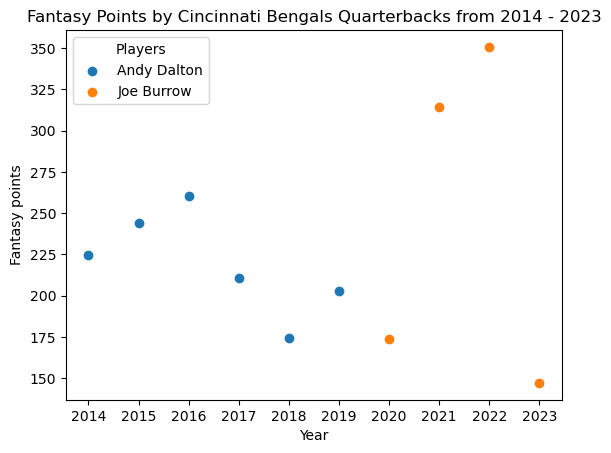

In [192]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig1, ax1 = plt.subplots()

for player in qb_df['Player'].unique(): 
    player_data = qb_df[qb_df['Player'] == player] 
    ax1.scatter(player_data['Year'], player_data['FantPt'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fantasy points')
ax1.set_title('Fantasy Points by Cincinnati Bengals Quarterbacks from 2014 - 2023')

plt.show()

The goal then is to make a graph for all of the position groups, here is an example of the graph for just the quarterbacks, where the blue poitns Andy Dalton and the Orange are Joe Burrow. I am going to create similar graphs to this but which will include more players for the different groups, I would also like to include 4 different graphs all under the label of the teams that I am covering.

In [198]:
stats.describe(qb_df['FantPt'])

DescribeResult(nobs=10, minmax=(147.16, 350.7), mean=230.31799999999998, variance=4117.659062222222, skewness=0.6238356878107674, kurtosis=-0.6044678724887724)

I am going to also use the describe function to show a little more data, such as the mean and the minimum and maximum fantasy points scored by each position group

In [200]:
total_qbfantPt = qb_df['FantPt'].sum()
total_qbfantPt

2303.18

The number above is the total for all of the qb fantasy stats. I am going to use the total for all of the position groups that I track to calculate which team has been the best over fantasy since 2014. The next step for this project is to make the code for acquiring the players more e